# **Customer Questions**

What things might a normal customer want to know?

## **Average Price and Range**

The average diamond price is \$3932.80. The spread is from \$326 all the way to \$18497, which is a crazy high range of \$18497.
The actual spread of prices is also high, with the standard deviation of prices being \$3989.44.

In [6]:
#Packages are great - they let me be lazy!
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score

df = pd.read_csv('https://www.dropbox.com/s/17mfhd6s4xc3cmk/Diamond%20Price%20Prediction.csv?dl=1')

#Just a little data
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
#Useful to know the column names.
print(df.columns)

Index(['Carat(Weight of Daimond)', 'Cut(Quality)', 'Color', 'Clarity', 'Depth',
       'Table', 'Price(in US dollars)', 'X(length)', 'Y(width)', 'Z(Depth)'],
      dtype='object')


In [8]:
#Let's get some averages in here.
pAvg = df['Price(in US dollars)'].mean()
pMax = df['Price(in US dollars)'].max()
pMin = df['Price(in US dollars)'].min()
pRange = pMax - pMin
pStd = df['Price(in US dollars)'].std()

#You can tune a cello to have an f string, but that's a bad idea.
print(f"Mean: {pAvg}\nMax: {pMax}\nMin: {pMin}\nRange: {pRange}\nSpread: {pStd}")
print('Average carat: ' + str(round(df['Carat(Weight of Daimond)'].mean(), 4)))

Mean: 3932.799721913237
Max: 18823
Min: 326
Range: 18497
Spread: 3989.439738146379
Average carat: 0.7979


## **Average Price by Common Colors**

The average price when the color is D is \$8382.07.

The average price when the color is E is \$3798.33.

Basically, if you want the higher tiered color, it's way more expensive. I personally can't see the difference unless it's below E. There are relatively few D diamonds below \$2500, but there are around 100 E diamonds below that price.

In case someone reading this is actually looking for a diamond for a special someone, you can see the difference in things below E. Cut is the most important factor. The best blend of price and beauty is a very good cut (ideal is shape, not cut quality), E color, and very good clarity. Carat is your choice.

In [11]:
df['Cut(Quality)'].unique()
df['Clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

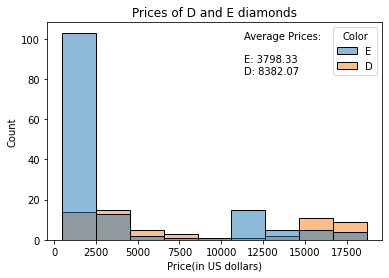

In [14]:
#Make a new dataframe with color values of only D and E. Clarity is IF and cut is also high, because that's what people usually want.
df_de = df[
          ((df['Cut(Quality)'] == 'Very Good') | (df['Cut(Quality)'] == 'Premium') | (df['Cut(Quality)'] == 'Ideal')) &
          (df['Clarity'] == 'IF') & 
          ((df['Color'] == 'D') | (df['Color'] == 'E'))]


#All these are ever gonna be is means.
dAvg = df_de[df_de['Color'] == 'D']['Price(in US dollars)'].mean()
eAvg = df_de[df_de['Color'] == 'E']['Price(in US dollars)'].mean()

#Info for the graph.
deText = "Average Prices:\n\nE: " + str(round(eAvg, 2)) + "\nD: " + str(round(dAvg, 2))
plt.text(.58, .7, deText, transform = plt.gcf().transFigure)
plt.title("Prices of D and E diamonds")

#Plot the graph!
sns.histplot(df_de, x = 'Price(in US dollars)', hue = 'Color')
plt.show()


## **Price Differences by Color**

There is a statistically significant difference between the average prices of premium cut and very good cut diamonds except among the highest and lowest color grades. The most expensive premium cut diamond has color grade J. This is odd to me. Color grade I is the most expensive Very Good cut diamond.

The price difference between cut and color is likely due to carat. Price between cuts differs dramatically for colors I and J, but is much closer for everything else.

t: -15.058
p: 0.0


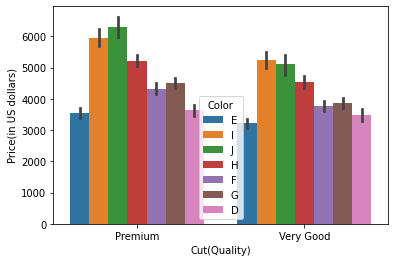

In [15]:
#Get the right dataframe for this question. Not a creative name, but that's OK.
df_c = df[((df['Cut(Quality)'] == 'Very Good') | (df['Cut(Quality)'] == 'Premium'))]

#Plot it!
sns.barplot(x = 'Cut(Quality)', y = 'Price(in US dollars)', hue = 'Color', data = df_c)

#Get the actual test done.
t, p = stats.ttest_ind(df_c['Cut(Quality)'] == 'Very Good', df_c['Cut(Quality)'] == 'Premium')
print("t: " + str(round(t, 3)))
print("p: " + str(round(p, 3)))

# **Manager Questions**
What might a manager want to know about a diamond business?

## **Most Sales by Cut, Clarity, and Color.**

The highest quality cut that exists is ideal; the most common cut is also ideal.

The most common clarity is SI1, a fairly low clarity.

The most common color is G, a very low color.

It appears that cut matters more to most customers than color or clarity.

In [5]:
#Mode is the most common entry
print("Most common cut: " + df['Cut(Quality)'].mode())
print("Most common clarity: " + df['Clarity'].mode())
print("Most common color: " + df['Color'].mode())

0    Most common cut: Ideal
dtype: object
0    Most common clarity: SI1
dtype: object
0    Most common color: G
dtype: object


## **Weight to Price**

Answer: As the weight of a diamond goes up, so does the price of the diamond.

The r value is 0.9216, which means it has a very strong correlation. It is statistically significant. We know this because the p value is below 0.05.

The variance in price is hugely influenced by carat. The r2 value is 0.8493, which is very high.

The average price is $3932.80.

It appears that the bigger  the carat, the higher the average price of the diamond. The max price does not change by carat. This trend is generally true until we hit 4.2 carats, at which point the prices are generally the same, likely due to other diamond factors such as color or clarity.

r: 0.9216
p: 0.0
Slope: 7756.4256
Intercept: -2256.3606
r2: 0.8493
Avg: $3932.7997


C:\Users\Andrew\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


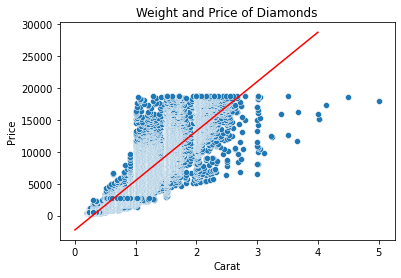

In [17]:
#Make the scatter plot
sns.scatterplot(df['Carat(Weight of Daimond)'], df['Price(in US dollars)'])
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Weight and Price of Diamonds')

#Linear regression equation
corr = stats.pearsonr(df['Carat(Weight of Daimond)'], df['Price(in US dollars)'])
model = np.polyfit(df['Carat(Weight of Daimond)'], df['Price(in US dollars)'], 1)
predict = np.poly1d(model)
r2 = r2_score(df['Price(in US dollars)'], predict(df['Carat(Weight of Daimond)']))

#Print useful info.
print('r: ' + str(round(corr[0], 4)) + '\np: ' + str(round(corr[1], 4)))
print('Slope: ' + str(round(model[0], 4)) + '\nIntercept: ' + str(round(model[1], 4)))
print('r2: ' + str(round(r2, 4)))
print('Avg: $' + str(round(df['Price(in US dollars)'].mean(), 4)))

#Get the line
x_lin_reg = range(int(df['Carat(Weight of Daimond)'].min()), int(df['Carat(Weight of Daimond)'].max())) #Apparently ranges can't handle floats
y_lin_reg = predict(x_lin_reg)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')

plt.show()

In [18]:
#Why can't a range do floats???
weightRange = range(int(df['Carat(Weight of Daimond)'].min()), int(df['Carat(Weight of Daimond)'].max()))
print(weightRange)

range(0, 5)


## **Influence on Price - Carat**

High cut and clarity with middling color values are the most common. Let's see how carat effects (not a misspelling) price in these diamonds.

The strength of these two factors in this specific group is very high with an r value of 0.9675. This is statistically significant, as the p value is below  0.05.

The average price in this group is \$3441.11. The variance in price can be mostly explained by the carat; the r2 value is 0.936.

The relationship between the carat and price is much stronger for this specific type of diamond than other types. However, this specific type of diamond drops off at just under 2.5 carats. If diamonds of a higher size with the same clarity, cut, and color quality can be found, the price will likely continue along this fairly linear model.

r: 0.9675
p: 0.0
Slope: 8396.4032
Intercept: -2942.3216
r2: 0.936
Avg: $3441.1076


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


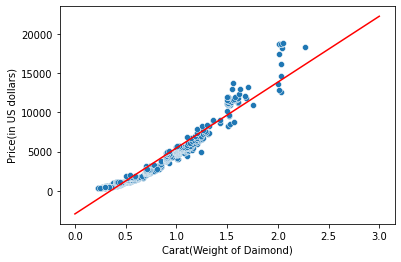

In [11]:
#Filter the data
df_6 = df[(df['Cut(Quality)'] == 'Ideal') & (df['Clarity'] == 'SI1') & (df['Color'] == 'G')]

sns.scatterplot(df_6['Carat(Weight of Daimond)'], df_6['Price(in US dollars)'])

#Generate the line
corr = stats.pearsonr(df_6['Carat(Weight of Daimond)'], df_6['Price(in US dollars)'])
model = np.polyfit(df_6['Carat(Weight of Daimond)'], df_6['Price(in US dollars)'], 1)
predict = np.poly1d(model)
r2 = r2_score(df_6['Price(in US dollars)'], predict(df_6['Carat(Weight of Daimond)']))

x_lin_reg = range(int(df_6['Carat(Weight of Daimond)'].min()), 4)
y_lin_reg = predict(x_lin_reg)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')

#Print some stuff
print('r: ' + str(round(corr[0], 4)) + '\np: ' + str(round(corr[1], 4)))
print('Slope: ' + str(round(model[0], 4)) + '\nIntercept: ' + str(round(model[1], 4)))
print('r2: ' + str(round(r2, 4)))
print('Avg: $' + str(round(df_6['Price(in US dollars)'].mean(), 4)))

# **Sourcing Team Questions**
What diamonds should a sourcing team purchase?

## **Influnce on Price - Numeric Factors**

The most important factor to consider is carat. This makes sense - the bigger the diamond, the more expensive it is.

It's not important to consider the overall depth or table. Theu simply don't correlate with the price as much. X, Y, and Z correlate far more than table, but that's because diamonds are all roughly the same shape, and those dimensions determine carat.

From another analysis I've done, it appears that cut is the most important factor outside of carat, but for now we are only considering numeric data.

In [33]:
#This will get the numeric correlations.
df.corr()['Price(in US dollars)'].sort_values()


Depth                      -0.010647
Table                       0.127134
Z(Depth)                    0.861249
Y(width)                    0.865421
X(length)                   0.884435
Carat(Weight of Daimond)    0.921591
Price(in US dollars)        1.000000
Name: Price(in US dollars), dtype: float64

## **Influence on Price - Cut**

There is a statistically significant difference in prices between the different cuts. It appears that the average price of the higher cuts goes down. This is because of the average carat going down as cut goes up.

f: 175.6887
p: 0.0


<AxesSubplot:xlabel='Cut(Quality)', ylabel='Price(in US dollars)'>

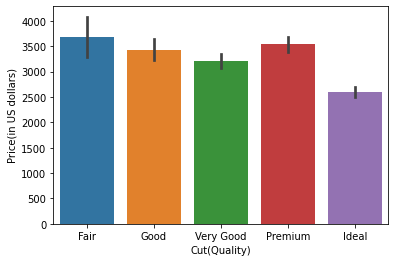

In [20]:
#Only diamonds with the color E are considered
df_8 = df[df.Color == 'E']

groups = df['Cut(Quality)'].unique()
group_labels = []
for each in groups:
  group_labels.append(df[df['Cut(Quality)'] == each]['Price(in US dollars)'])

f, p = stats.f_oneway(*group_labels)
print('f: ' + str(round(f, 4)))
print('p: ' + str(round(p, 4)))

sns.barplot(x = 'Cut(Quality)', y = 'Price(in US dollars)', data = df_8, order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

## **Influence on Price - Cut**

There is a statistically significant difference between the prices of Fair/Ideal, Good/Ideal, Ideal/Premium, Ideal/Very Good, and Premium/Very Good.

It's interesting to note that Fair/Good, Fair, Premium, Fair/Very Good, Good/Premium, and Good/Very Good don't have statistically significant differences, despite the large quality difference.

These differences are due to the different average size of each diamond - as will be shown in the next analysis, higher carats (which have the highest correlation with price) are only found in lower cuts.

In [22]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = df_8['Price(in US dollars)'], groups = df_8['Cut(Quality)'], alpha = 0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2   meandiff  p-adj    lower      upper   reject
---------------------------------------------------------------
   Fair      Good  -258.6683 0.8333  -932.5764  415.2397  False
   Fair     Ideal -1084.7624    0.0 -1707.0523 -462.4725   True
   Fair   Premium  -143.3981 0.9723  -776.9033  490.1072  False
   Fair Very Good  -467.6604 0.2581  -1100.438  165.1172  False
   Good     Ideal  -826.0941    0.0 -1156.1609 -496.0273   True
   Good   Premium   115.2703 0.8983  -235.4836  466.0242  False
   Good Very Good  -208.9921  0.477    -558.43  140.4458  False
  Ideal   Premium   941.3643    0.0   704.4657 1178.2629   True
  Ideal Very Good    617.102    0.0   382.1563  852.0477   True
Premium Very Good  -324.2623  0.007  -587.4803  -61.0444   True
---------------------------------------------------------------


In [23]:
cuts = df_8['Cut(Quality)'].unique()

for cut in cuts:
  print(cut + ": " + str(df_8[df_8['Cut(Quality)'] == cut]['Carat(Weight of Daimond)'].mean()))
  

Ideal: 0.578401229823213
Premium: 0.717744972186564
Good: 0.7451339764201501
Fair: 0.8566071428571428
Very Good: 0.6763166666666666


# **Density by Cut**

This is a density plot; it shows the density of continuous numerical data by a categorical label.

This chart shows the carat ranges of different cuts. It appears that the largest carat diamonds (from 4.2 to 5) are only found with fair cuts. This is potentially ok - there is no significant difference in price between fair and good diamonds. However, the premium diamonds, which border on fair diamonds in density by carat, does have a significant difference.

My recommendation is to find the 4 and 5 carat diamonds in higher cuts than fair. Premium and ideal would be best, considering the previous analysis.

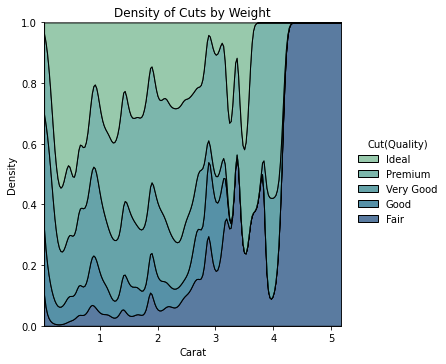

In [24]:
cutOrder = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'] 
sns.displot(data = df, x = 'Carat(Weight of Daimond)', hue = 'Cut(Quality)', kind = 'kde', multiple = 'fill', palette = 'crest', hue_order = cutOrder)
plt.xlabel('Carat')
plt.ylabel('Density')
plt.title('Density of Cuts by Weight')
plt.show()


# **Influence on Price - Categorical Factors**
I'll add this later. I'll probably encode the categorical factors as numeric factors, but we'll see what I decide to do. Check back later for more!